In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append("./libs")

from imtools import imres

In [2]:
# Import images
# _s and _m represents scratched and mask images respectively
# mask image is only black and white, import it as grayscale
# OpenCV imports image as BGR. I change it to RGB for captability in matplotlib.pyplot.imshow

# img1 is a cat
img1 = cv2.imread('images/img1_clean.jpeg')         # clean image
img1_s = cv2.imread('images/img1_scratch.jpeg')     # scratched image
img1_m = cv2.imread('images/img1_mask.bmp', 0)      # mask image

# img2 is a cat as well
img2 = cv2.imread('images/img2_clean.jpeg')
img2_s = cv2.imread('images/img2_scratch.jpeg')
img2_m = cv2.imread('images/img2_mask.bmp', 0)

# img3 is fruit
img3 = cv2.imread('images/img3_clean.jpeg')
img3_s = cv2.imread('images/img3_scratch.jpeg')
img3_m = cv2.imread('images/img3_mask.bmp', 0)

In [3]:
# Initializing the resotration process
img1res = imres(img1, mask = img1_m, cutoff = 1500)
img2res = imres(img2, mask = img2_m, cutoff = 1500)
img3res = imres(img3, mask = img3_m, cutoff = 3000)

In [4]:
# Iterate 5 times
for i in range(5):
    img1res.restore()
    img2res.restore()
    img3res.restore()

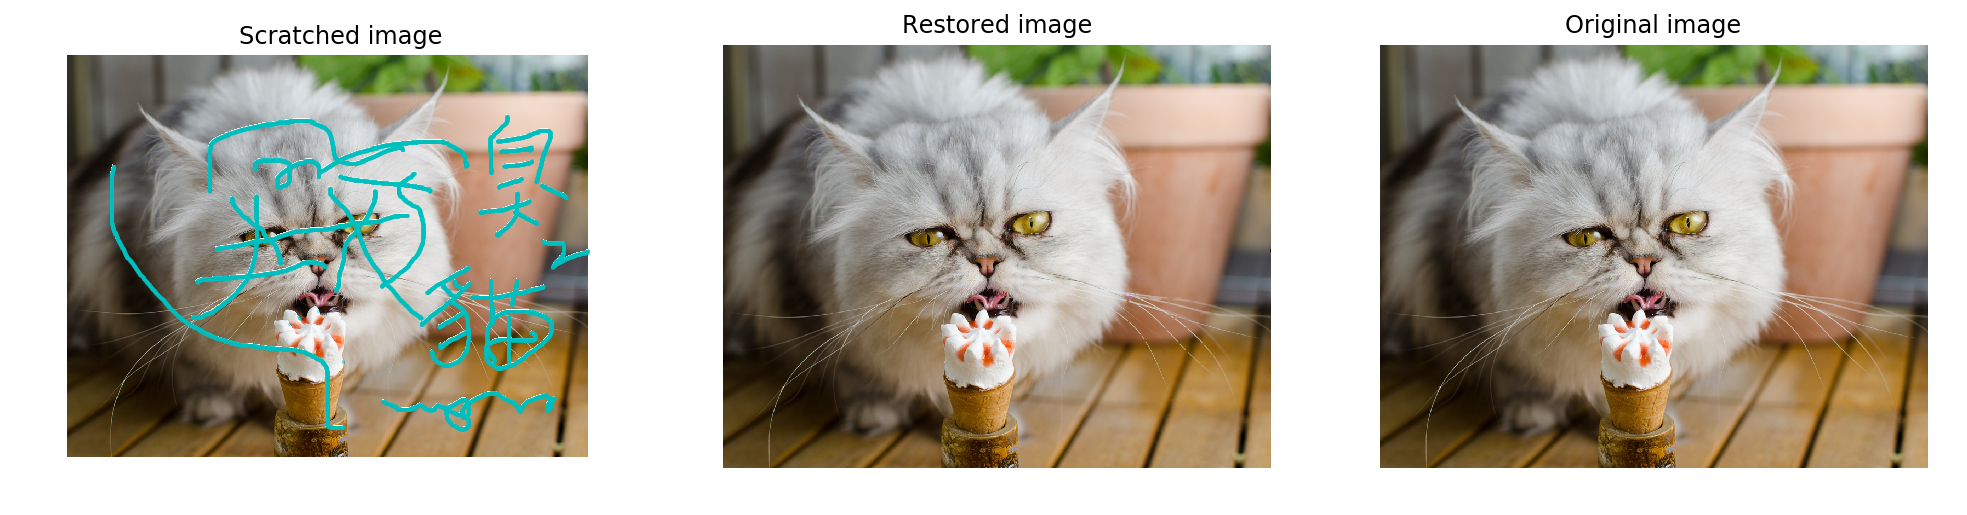

In [5]:
# Compare the three images: scratched, restored and original
# The slice option [:,:,::-1] swaps the BGR in cv2 into RGB which accepts by plt.imshow
plt.figure(figsize=(25/1.5,9/1.5))
plt.subplot(1,3,1)
plt.imshow(img1_s[:,:,::-1])
plt.scatter(np.array(img1res.mask).T[1],np.array(img1res.mask).T[0],s=0.05,color="c")
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img1res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img1[:,:,::-1])
plt.title("Original image")
plt.axis("off")

# plt.savefig("img1_restored.png",dpi=300,bbox_inches = 'tight')

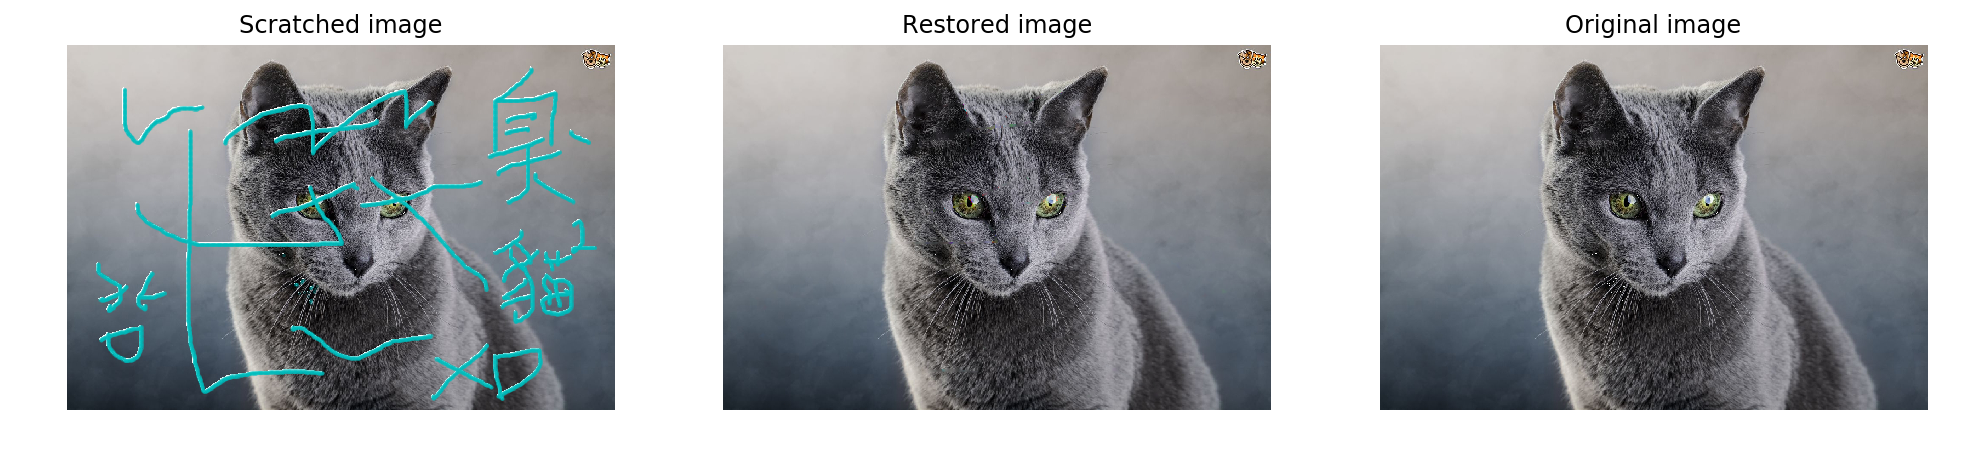

In [6]:
plt.figure(figsize=(25/1.5,9/1.7))
plt.subplot(1,3,1)
plt.imshow(img2_s[:,:,::-1])
plt.scatter(np.array(img2res.mask).T[1],np.array(img2res.mask).T[0],s=0.01,color="c")
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img2res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img2[:,:,::-1])
plt.title("Original image")
plt.axis("off")

# plt.savefig("img2_restored.png",dpi=300,bbox_inches = 'tight')

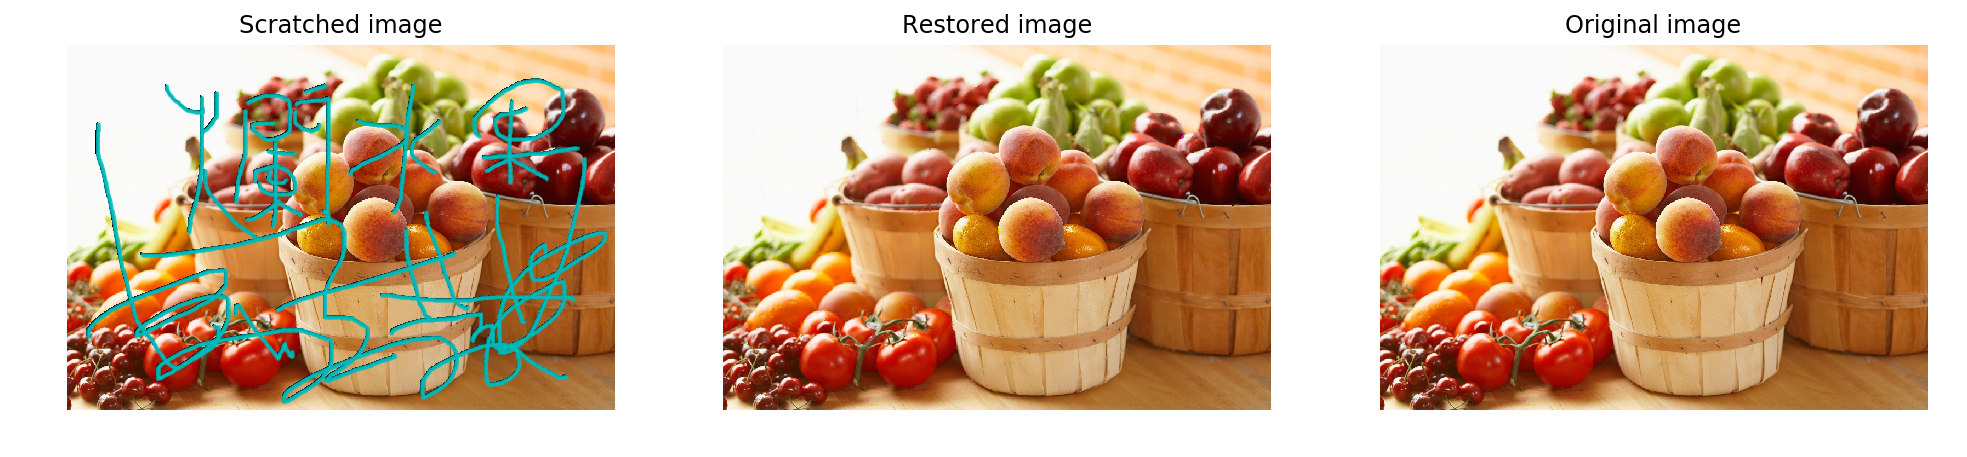

In [7]:
plt.figure(figsize=(25/1.5,9/2))
plt.subplot(1,3,1)
plt.imshow(img3_s[:,:,::-1])
plt.scatter(np.array(img3res.mask).T[1],np.array(img3res.mask).T[0],s=0.01,color="c")
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img3res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img3[:,:,::-1])
plt.title("Original image")
plt.axis("off")

# plt.savefig("img3_restored.png",dpi=300,bbox_inches = 'tight')